# Gradient descent

In the activity we began to perform steps for the Gradient Descent algorithm on the dfunction
$$ f(x,y) = (x-2)^2 + (y+1)^2 + 5\sin(x)\sin(y) + 100.$$
Here is a plot of the function. We will cover how to create plots like this on Monday. My goal for today is to get you able to run gradient descent so that you can start the homework.

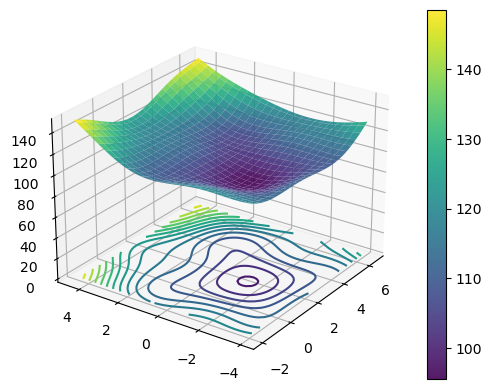

In [1]:
%matplotlib inline 
# Without matplotlib notebook, 3D figures are hard to look at and use
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting


f = lambda x, y: (x-2)**2 + (y+1)**2 + 5*np.sin(x)*np.sin(y) + 100 # Define the function

# For plotting we used linspace before. Now we need it for x and y.
x = np.linspace(-2, 6.5, 50)
y = np.linspace(-4, 4.5, 50)
# For 3D plotting you need to use meshgrid. We will talk more about this next week.
X, Y = np.meshgrid(x,y)

# This is a new way to make figures. This is actually the better way to do it, but requires some more thinking. 
# We will talk more about this next week. 
fig = plt.figure() # Create a figure
ax = plt.axes(projection='3d', computed_zorder=False) # We are going to make 3D axes. That's what "projection='3d'" does
                                    # The "computed_zorder" is something else that you won't need to worry about.
surface = ax.plot_surface(X, Y, f(X,Y), cmap = 'viridis', linewidth=1, cstride = 2, rstride=2, alpha=0.9, zorder=1)
# plot_surface makes a surface. You provide X, Y, and Z values. These need to be on a meshgrid. 
# We also choose a colormap "viridis", cstride and rstride are just there for looks, alpha = 0.9 says something
# about how opaque the surface is, and zorder=1 is something you don't need to worry about.
ax.set_zlim([0, 150]) # Change the z axis limits.
ax.view_init(25, -145) # With a 3D image you can rotate it around. This makes us choose an initial rotation.
fig.colorbar(surface) # Colorbars tell us how to relate colors on the surface to function valeus.

ax.contour(X, Y, f(X,Y), levels=17, offset = 0, cmap = 'viridis', zorder=2) # Create a contour plot underneath the surface

Notice that this figure is different from the one I showed in class before. The figure I showed before is from MATLAB because the MATLAB 3D plotting is nicer looking than matplotlib. 

In any case, we can continue. 

We saw that you can redefine the function $f(x,y)$ in terms of one variable, $\vec p = [x,y]$: $f(x,y) = f(\vec p)$. 

In [2]:
fp = lambda p: f(p[0], p[1]) # Adapter function. p[0] = x, p[1] = y

We also defined a function for the gradient, using the same trick of the adapter function.

In [3]:
gradf_xy = lambda x, y: np.array([2*(x-2) + 5*np.cos(x)*np.sin(y),
                                  2*(y+1) + 5*np.sin(x)*np.cos(y)])

gradf = lambda p: gradf_xy(p[0], p[1]) # Adapter function

With everything setup for this problem, we can begin gradient descent. We want to start at the point $$\vec p_0 = \begin{bmatrix} 6 \\ 4 \end{bmatrix}$$. 

In [4]:
p0 = np.array([6, 4])

We can visualize that point in the $(x,y)$ plane and put a corresponding point on the surface at $f(\vec p_0)$.

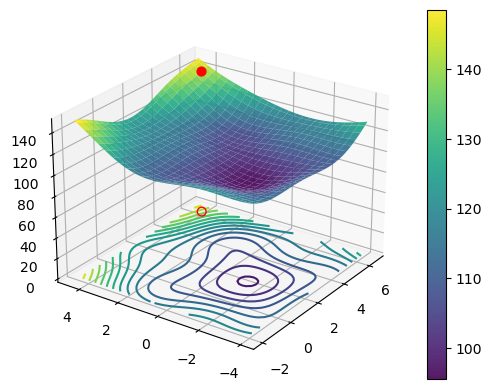

In [5]:
ax.scatter(p0[0], p0[1], 0, color='r', s=40, zorder=10, facecolors='none', edgecolors='r')
# Creates a 3D scatter plot (because I said ax., that means it is part of "ax", defined above). 
# s = 40 determines the size of the dots, facecolors='none' means the marker will be open not filled in.
ax.scatter(p0[0], p0[1], fp(p0), color='r', s=40, zorder=10)
fig # Shows the plot

We then calculate the gradient to determine which direction to move for the next guess (go in the direction of the negative gradient).

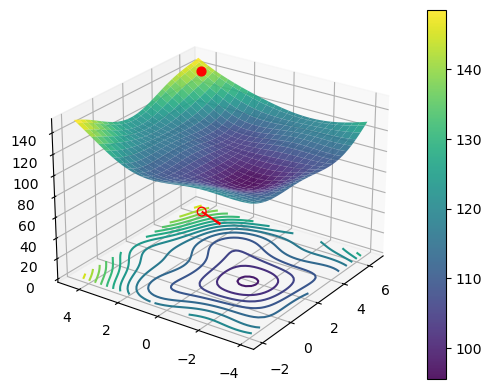

In [6]:
grad = gradf(p0)
ax.quiver(p0[0], p0[1], 0, -grad[0], -grad[1], 0, normalize=True, color='r', length = 1.5) 
# Quiver creates an arrow. Unfortunately it's not very good in matplotlib.
fig

Then we create a function which defines the path that we will travel along to reach the next guess.

In [7]:
phi = lambda t: p0 - t*gradf(p0)        # phi(t) = p0 - t*grad(p0)      

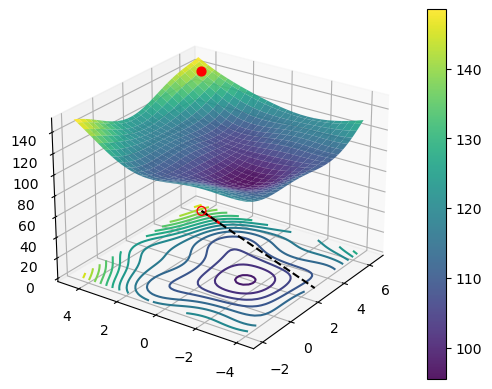

In [8]:
# Plot a straight line from the point phi(0) to the point phi(1). Make it dashed and black.
ax.plot([phi(0)[0], phi(0.75)[0]], [phi(0)[1], phi(0.75)[1]], 0, '--k') 
fig

Now how does this line help us? Well, if we find the minimum of the function along this line, call it `p1`, then we will know that `p1`<`p0`: we have successfully gone downhill. So this means we need to think about this line *on the surface.* This is sometimes called "lifting the curve to the surface."


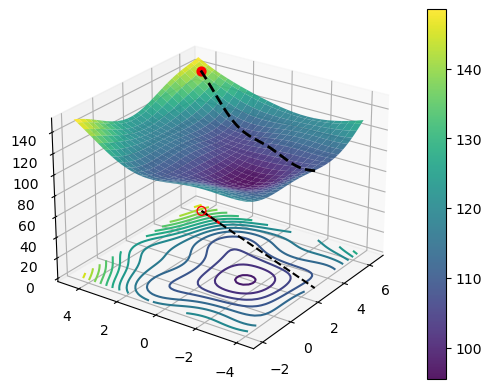

In [9]:
## This is the next step in gradient descent
f_of_phi = lambda t: fp(phi(t)) # This is just function composition!

## Below is plotting
# You won't need to do next 5 lines, this is just for plotting
tvals = np.linspace(0, 0.75, 100)
phi_vals = np.array([ [phi(t)[0], phi(t)[1]] for t in tvals]) # Create an array of the points in the (x,y) plane
f_of_phi_vals = np.array([f_of_phi(t) for t in tvals]) # Create an array of the function values at those points.
ax.plot(phi_vals[:, 0], phi_vals[:, 1], f_of_phi_vals, '--k', lw=2, zorder=10)
fig

Now we want to find the value of t which corresponds to the minimum height along the path. So how do we do this? Well luckily this new function, `f_of_phi` is a function of only one variable: `t`. We talked before about how to solve such problems using a built-in python function: `scipy.optimize.fminbound()`

In [10]:
import scipy.optimize
t_min = scipy.optimize.fminbound(f_of_phi, 0, 1) # Find the argmin of f_of_phi
    # The above line says to find the argmin of the 1D function f_of_phi between t = 0 and t=1
print(t_min)

0.6014226852775726


This tells us the *argmin* of `f_of_phi`. This is a value of $t$ but we want to know what point it corresponds to in the plane. `phi` tells us that directly. We plug that in and call the new point `p1`. 

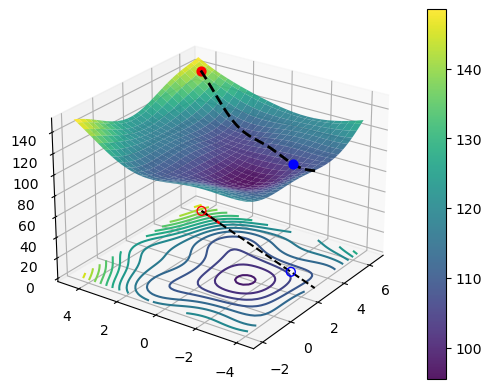

In [11]:
p1 = phi(t_min)

# Plot that new point on the figure
ax.scatter(p1[0], p1[1], 0, s=40, zorder=10, facecolors='none', edgecolors='b')
ax.scatter(p1[0], p1[1], f_of_phi(t_min), color='b', s=40, zorder=10)
fig

If you collect the lines of code that we used, we have

In [12]:
f = lambda x,y: (x-2)**2+(y+1)**2+5*np.sin(x)*np.sin(y)+100
fp = lambda p: f(p[0],p[1]) # Adapter function

# Below is the gradient
gradf_xy = lambda x, y: np.array([2*(x-2) + 5*np.cos(x)*np.sin(y),
                                  2*(y+1) + 5*np.sin(x)*np.cos(y)])

gradf = lambda p: gradf_xy(p[0], p[1]) # Adapter function

p0 = np.array([6, 4])                          # Choose an initial guess
grad = gradf(p0)                               # Find which direction to go
phi = lambda t: p0 - t*grad                    # Define the path in direction of negative grad
f_of_phi = lambda t: fp(phi(t))                 # Create a function of "heights along path"
tmin = scipy.optimize.fminbound(f_of_phi,0,1)  # Find time it takes to reach min height
p1 = phi(tmin)                                 # Find the point on the path and update your guess

But it is obvious that `p1` is not the argmin of the function. So what should we do next? And then after that?... How can we do this? I'll let you think about this for a minute.

The answer is a for loop! We keep doing the same steps over and over. But when do we stop? We want to stop when we are at the minimum, but how will we know? Just like with 1D functions, the minimum of a 2D function occurs when the derivative is zero. But what is the derivative here? That would be the gradient. So we want to stop when the gradient is zero. So maybe I should have something like (here is some pseudocode)
```
create a loop that goes 1000 times:
    do all of the steps to calculate p1
    # check if the gradient is zero
    if gradf(current_guess) == 0:
        break
```
Let's see what would happen if we did that with `p1`.

In [13]:
print(gradf(p1))
print(gradf(p1) == 0)

[ 5.40660412 -2.16339881]
[False False]


Notice that two things are output, that's because we are checking both elements of the gradient. It is the same as:

In [14]:
print(gradf(p1)[0]==0) # x coordinate
print(gradf(p1)[1]==0) # y coordinate

False
False


But that's not what we want to check! Because if the gradient is zero in just one of the directions that would not be enough, that would just mean that it is not downhill *in that direction*, it could still be very downhill in the other direction! 

Instead we need to introduce a new mathematical concept: the *norm*. The *norm* of a vector is the length of the vector. There are various types of norms, but the most obvious is the 2 norm, which is just like pythagorean's theorem. If $\vec v = [a, b]$ is a vector with two components, then
$$\|\vec v\|_2 = \sqrt{ a^2 + b^2}$$
which is exactly the Pythagorean theorem! If $\vec v = [a, b, c]$ has three components, we have instead
$$ \|\vec v\|_2 = \sqrt{a^2 + b^2 + c^2}$$
etc. The important thing about a norm is that **it converts a vector to a number, signifying the length of the vector.** This allows us to see **if the vector has length 0**. So instead of what we have above, we would have

In [15]:
print(np.linalg.norm(gradf(p1)))
print(np.linalg.norm(gradf(p1))==0)

5.823372092963342
False


We see that this still isn't true (because we aren't at the minimum) but now it is an unambiguous answer: either True or False. So maybe our pseudocode becomes:
```
create a loop that goes 1000 times:
    do all of the steps to calculate p1
    # check if the gradient is zero
    if norm(gradf(current_guess)) == 0:
        break
```
I'm going to give you some time to sit and think about why this doesn't work. The hint is that it's something we have talked about a few times and is tricky/unique to solving things on the computer!

It's rounding error! Checking if something equals zero is usually a bad idea. Insted we want to check if something is small. We have to use a tolerance, like we did for the quadratic equation. This of course means we won't find the exact minimum, but we will get close!

```
define a tolerance, 'tol'
create a loop that goes 1000 times:
    do all of the steps to calculate p1
    # check if the gradient is close to zero
    if |gradf(current_guess)|<tol:
        break
```

Now I'm not going to type all of this up for you. I'll let you put it together on the homework. My final hint will be that you should not call the variables `p0`, `p1`, etc. as we have done. That's because we don't know how many there will be. Instead, call the current guess `p` and update what `p` is everytime in the loop.

This idea is called *an iterative method*. We have a guess for our solution, `p`, and then we *iterate* or repeat a task over and over, updating `p` each time, until we have reached a desired goal (here that the norm of the gradient is small). 

## A different way to do gradient descent.

The gradient-descent algorithm as I've given it here isn't the only way to do it. I want to talk about another way. You will explore the two different methods on your homework.

Another strategy for gradient descent is to not find the value tmin by using fminbnd. Instead, at each step of the algorithm we can choose some predetermined constant tstep that determines how far we move in the direction of the negative of the gradient. To implement this, you can replace the code
```
phi = lambda t: p - t*grad # Define the path
f_of_phi = lambda t: fp(phi(t)) # Create a function of "heights along path"
tmin = scipy.optimize.fminbound(f_of_phi,0,1) # Find time it takes to reach min height
p = phi(tmin) # Find the point on the path and update your guess
```
with the single line of code
```
p = p - tstep*grad
```
This is obviously much simpler to program, but let's talk about what changes. To show how it changes the result I am going to show some figures that I created beforehand. We will just talk through the figures without the code.

#### First step with the new algorithm
First, let explore what happens when we do several steps of gradient descent using fminbnd at every step. (The code is hidden so you can't use it on your homework). Let's start by just looking at the first step.

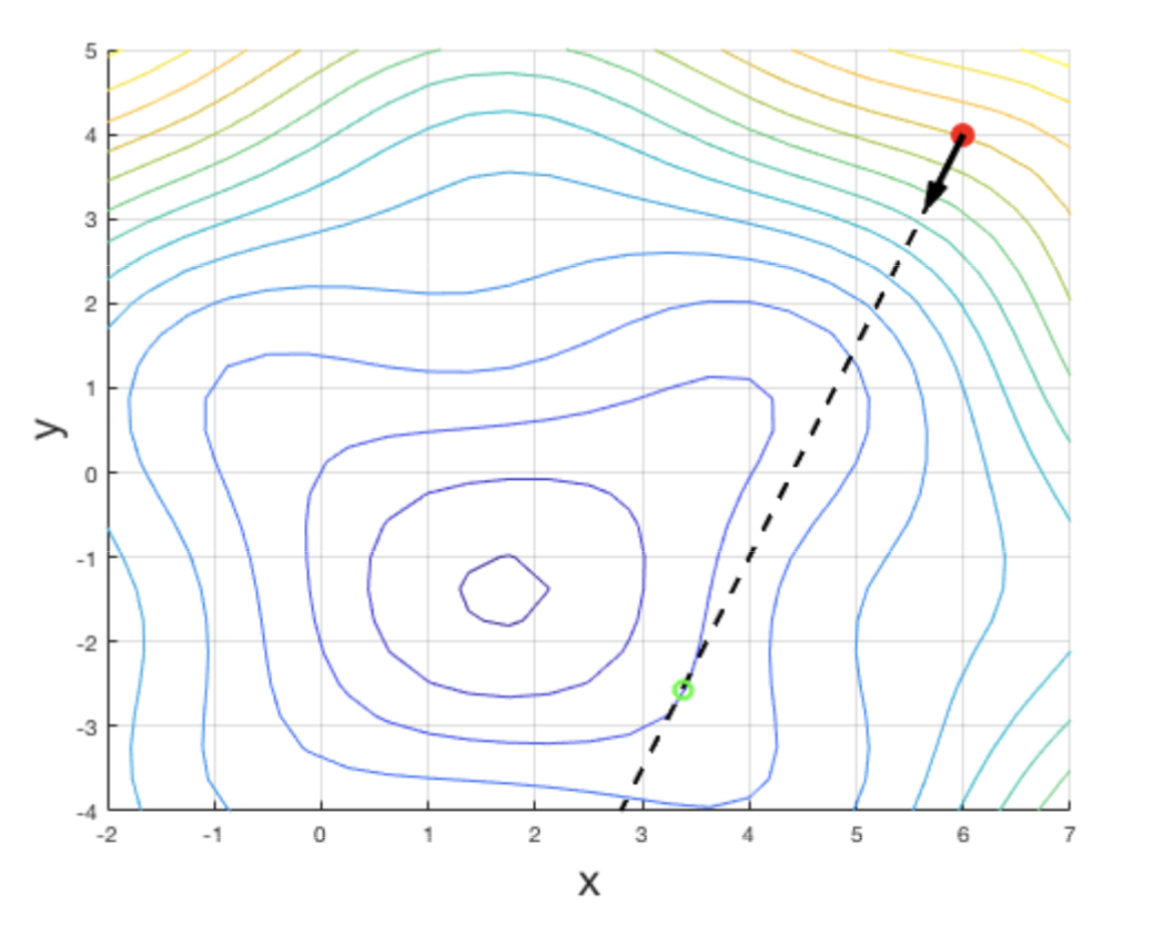

Notice that the direction that we travel is perpendicular to the contour line at the initial point. This will always be the case at each step of gradient descent - we move perpendicular to contour lines. Note also that you can tell from the contour lines when you should stop. Each "ring" as you move out from the minimum is a higher elevation. From the red dot to the green dot, you are traveling toward rings that are closer to the minimum. But after the green dot you would be traveling toward more outer rings. That is graphically how you can tell where the next point will be. 

The next step of gradient descent will start from the green dot. The path should be perpendicular to the contour line on which the green dot is located.

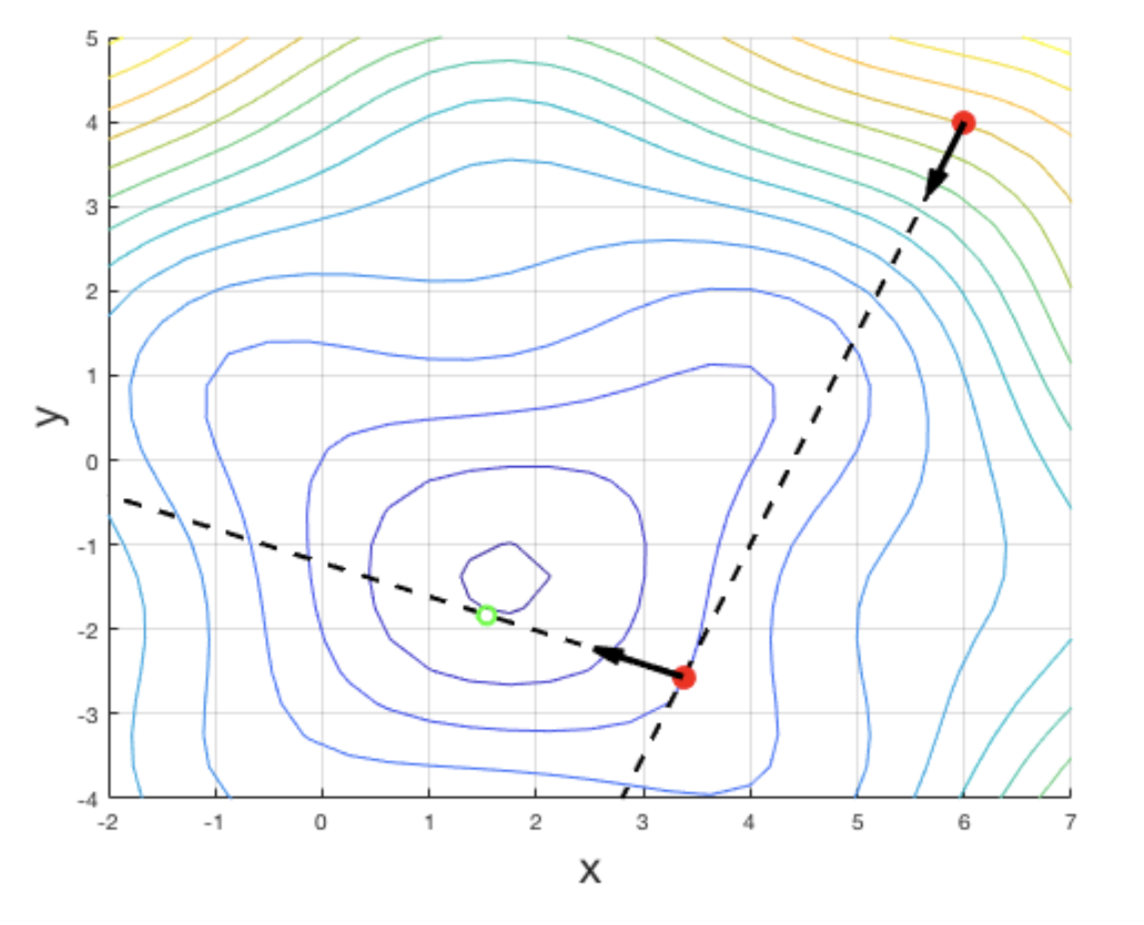

We see that we are now closer. We can do a third iteration to get closer.

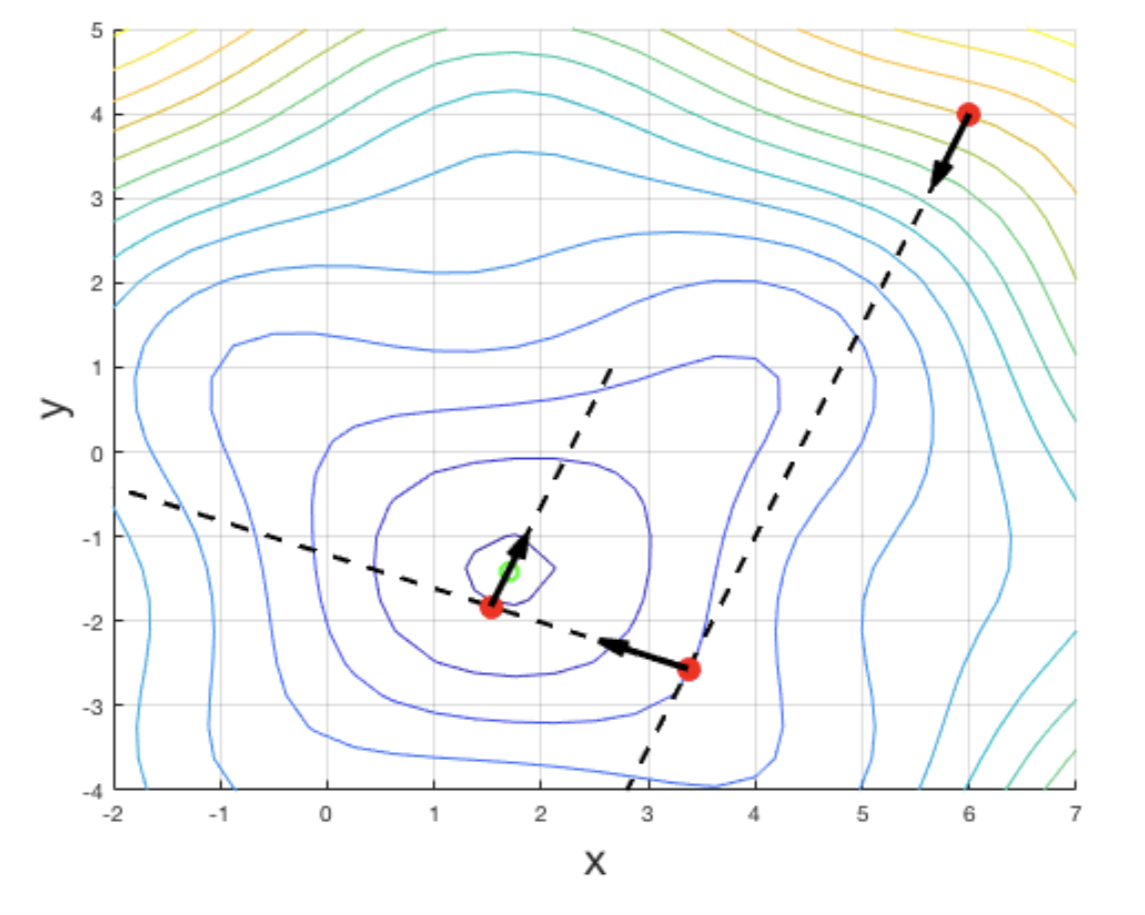

We essentially reach the minimum in 3 iterations. 

Now let's see what happens when we use the fixed-time-step algorithm.

Let's start with 10 iterations with tstep = 0.05.

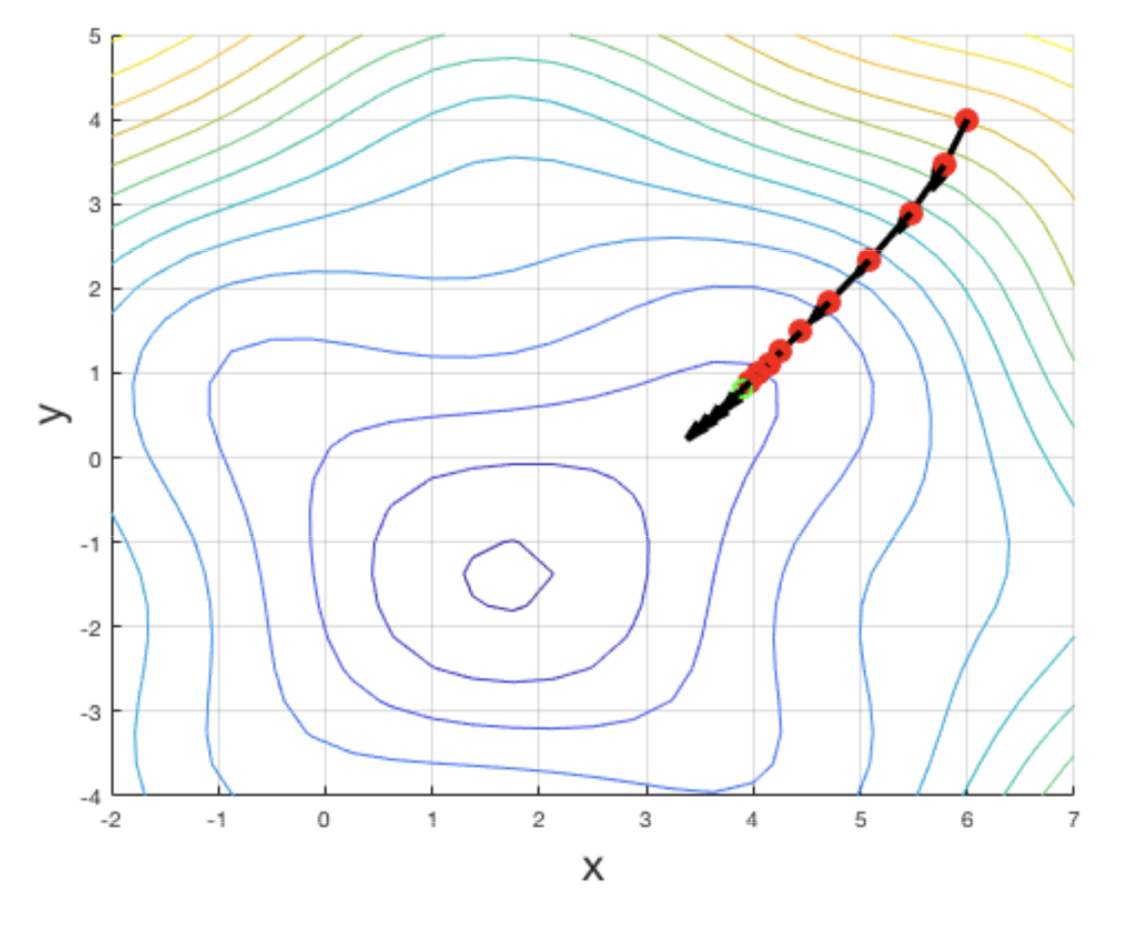

Notice that it is going to take a lot more iterations to reach the minimum than the fminbnd method. However, the path looks to be a much smoother path toward the minimum. Let's use more steps. 

This is what it looks like with 20 steps/iterations.

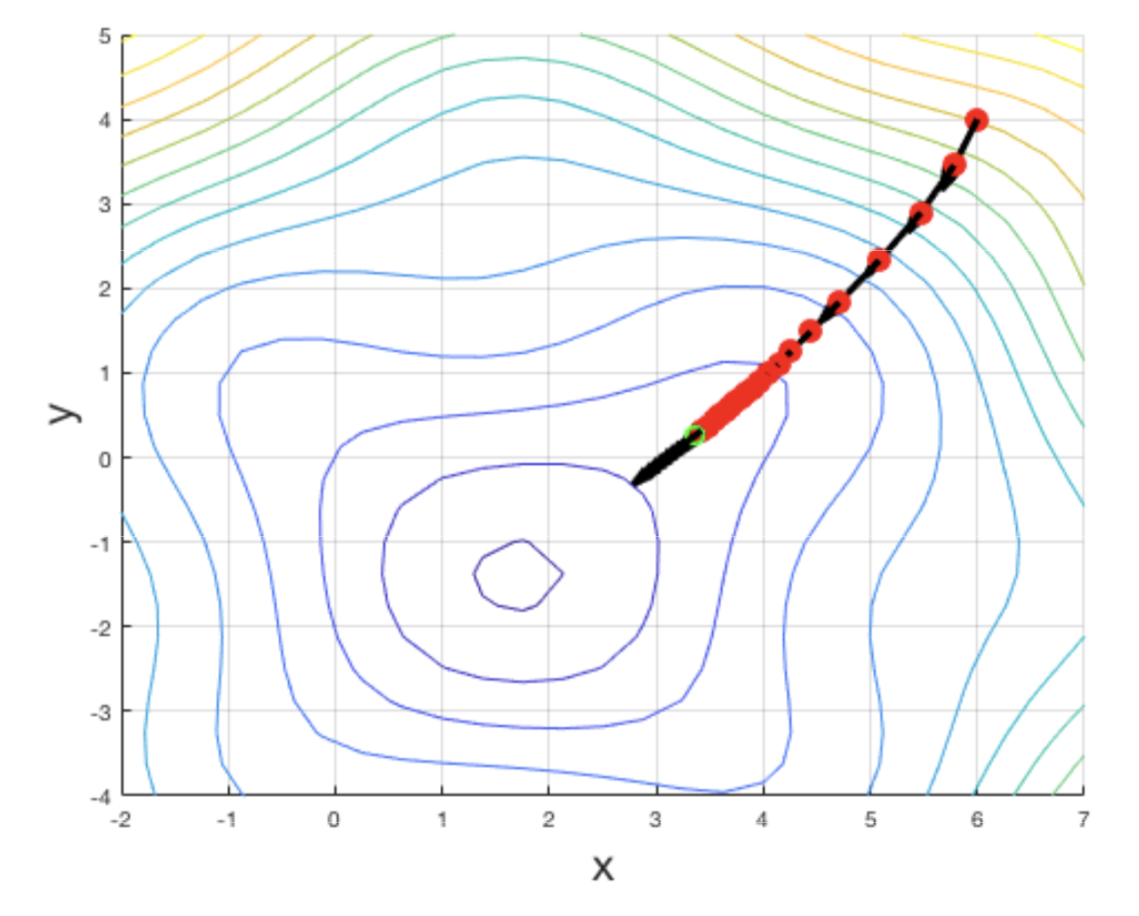

We are still not at the minimum after 20 iterations. Notice that the points are getting closer together. That is because even though tstep is fixed (we move along the path for the same amount of time each iteration), the gradient is different at different points and the gradient represents the velocity that we are moving. So when the points are close together, the gradient is small. Let's try more steps. This next figure is 30 iterations.

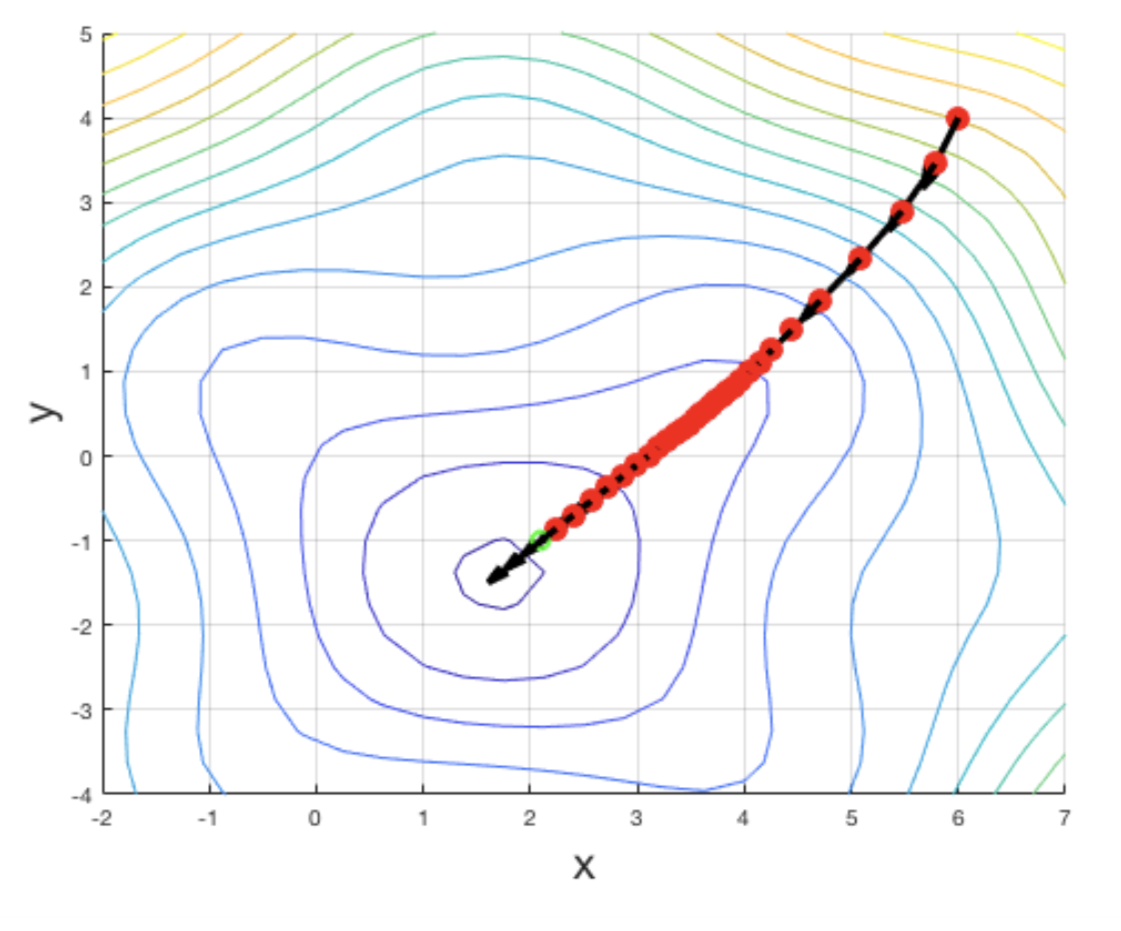

Even 30 iterations is not enough to get to the minimum! Let's try 40.

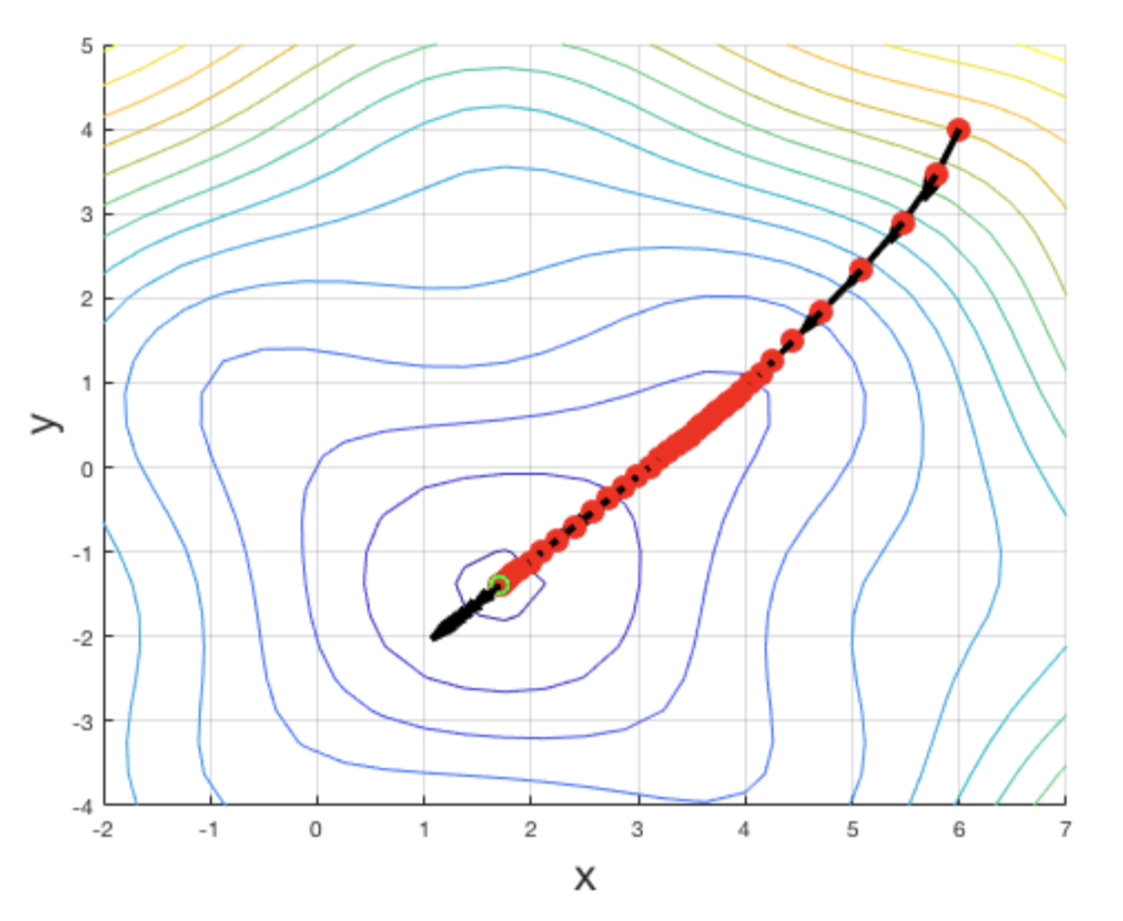

The minimum is reached somewhere between 30 and 40 iterations.

So this method took many more iterations that using fminbnd at each iteration. So it must be slower, right? Not necessarily. Even though it took more iterations, each iteration was relatively fast because the formula `p = p - tstep*grad` is simple. For the other method, we need to solve an optimization problem (using `fminbound`) for **EVERY** iteration. That could potentially be very slow. So which method is faster depends on the problem. Sometimes it is faster to do fewer iterations (`fminbound`) and sometimes it is faster to  avoid solving an optimization problem at each step (fixed step size). Often times, the most *expensive* part (meaning most operations) of the fixed step size algorithm is calculating the gradient at every step. So the faster method depends on how slow it is to calculate gradients vs how slow it is to do an optimization using fminbnd.

The method can converge in fewer iterations with a better choice of tstep. Let's try doubling it. Before we used `tstep = .05`, now let's use `tstep = 0.1` and do 10 iterations.

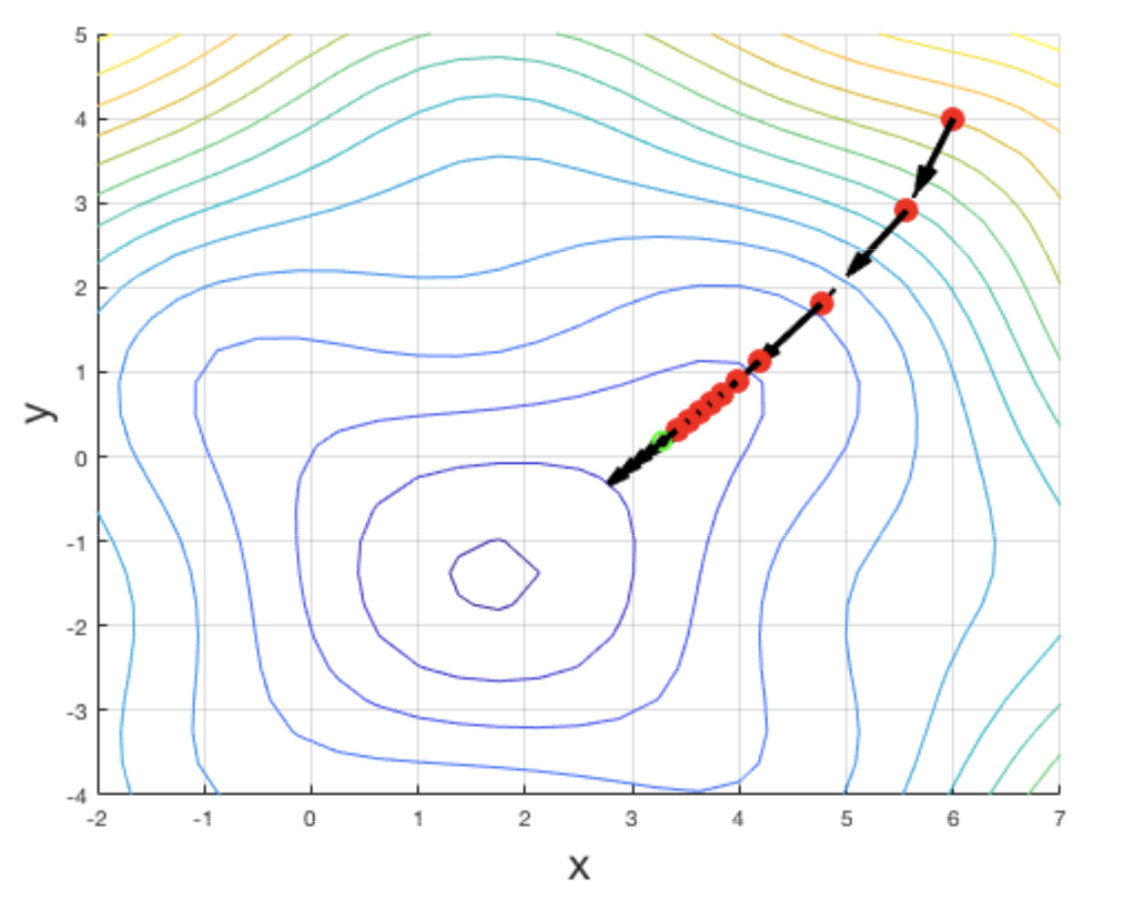

Notice that we are significantly closer to the minimum after 10 iterations than we were with tstep = 0.05.

We can do even better with a larger step size.

Choose `tstep=0.2` and do 10 iterations.

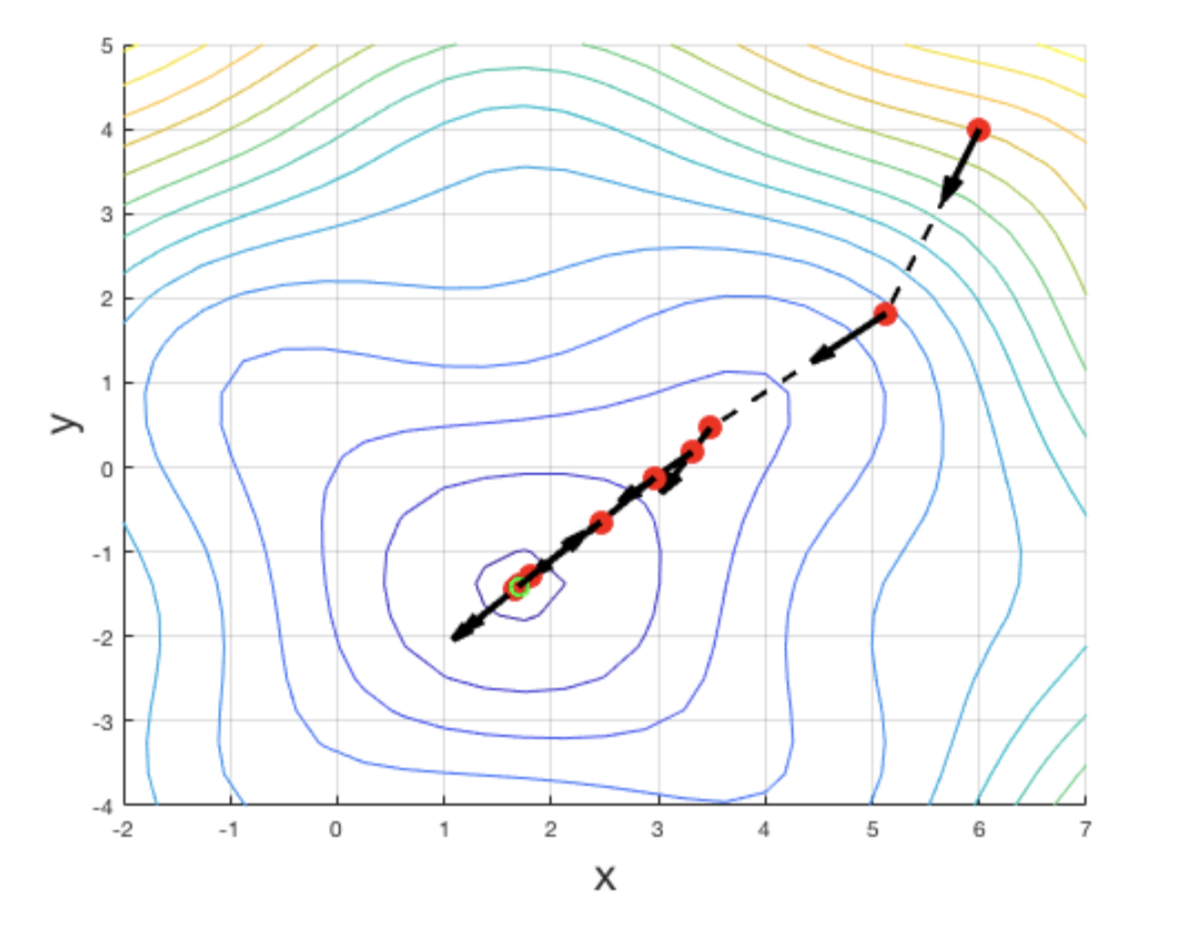

Notice that we reached the minimum in under 10 steps! However, the path is less smooth than before. The path becomes even more jagged if we increase the value of `tstep`.

Do `tstep=0.3` and do 5 iterations.

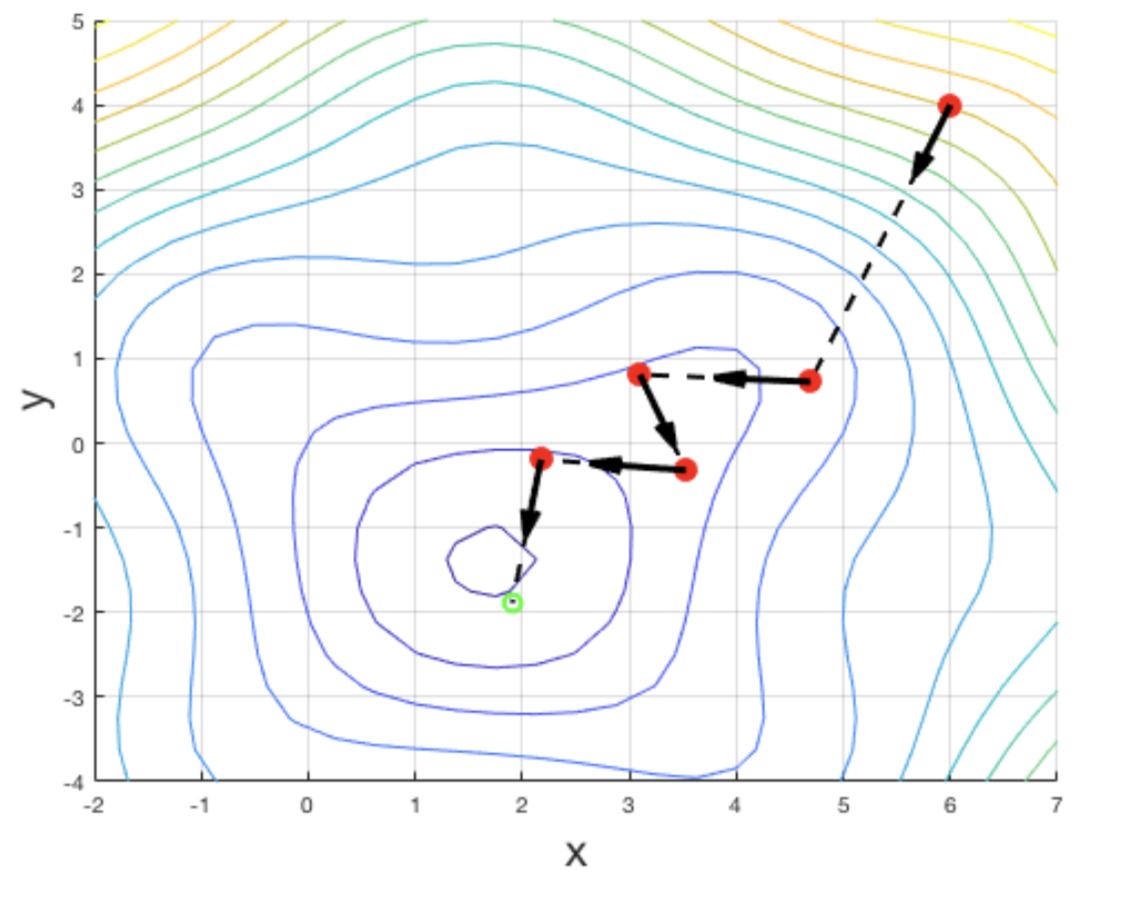

We still get close to the minimum in 5 iterations, but the path to getting there is far from direct. Things get even worse if we keep increasing `tstep`.

Next we'll try `tstep=0.5` and do 5 iterations.

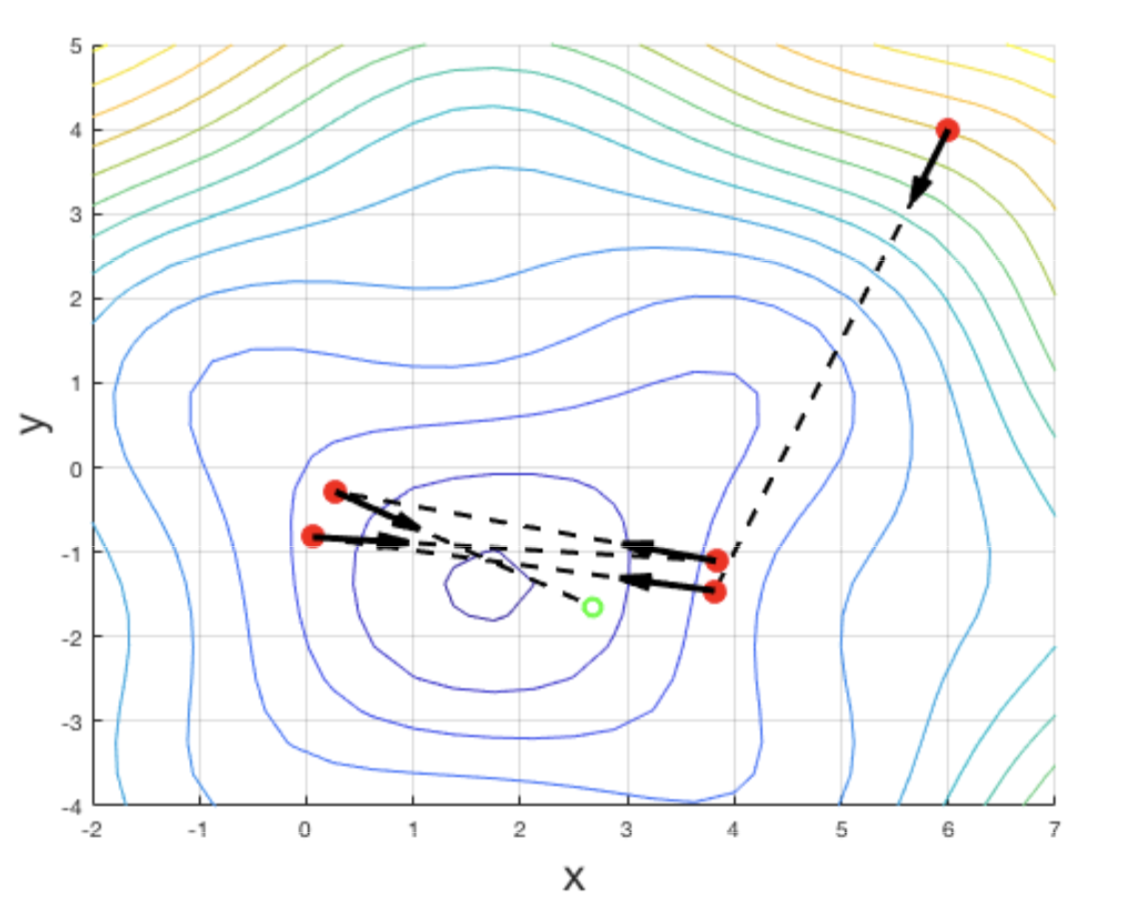

The first step takes us very close to the minimum, but then we start jumping back and forth across the minimum. This is typical of choosing a step size that is too large. You either hop back and forth across the minimum or you can miss it completely. So for this problem, something like tstep = 0.2 seems like a happy medium. The problem is that in practice, it is impossible to know what value of tstep will be best except by guessing and checking. If things are taking too long, you may have chosen too small of a value. If your guesses are erratic and jumping all over, you may have chosen too large.


You will explore these concepts more on the homework. Everyone always wants to know "so what is best?" The answer is that there is not a direct answer to that question: it depends on the problem. Usually in practice you'd work with a slightly more advanced version of this algorithm anyway.

There are other ways to find the minimum of multivariate functions besides Gradient Descent. A built-in `scipy` function that you will use on the homework is `scipy.optimize.fmin`. 

In [16]:
pmin = scipy.optimize.fmin(fp, p0) # this gives the argmin
print(pmin)
# We can get the minimum of fp by plugging the minimizer in
print(fp(pmin))

Optimization terminated successfully.
         Current function value: 95.363597
         Iterations: 42
         Function evaluations: 82
[ 1.69487388 -1.40630558]
95.36359670065853


Notice a few things. First, `scipy.optimize.fmin` prints out some details about how the algorithm went. This can be helpful information but we won't use it except to notice that it says "Optimization terminated successfully." The next thing to notice is that **you need to plug a function of one variable into this.** Notice that we use `fp` not `f`. All `scipy` algorithms require you to input functions like this. 